# Table of Contents


## Goals
This notebook contains an analysis on some Global earth temperature.  The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

## Data
The data for the project is taken from Kaggle:
https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures?resource=download


### Loading the data 


First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from Global Temperature.csv and preview the first five rows of the DataFrame.

In [74]:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [75]:
df = pd.read_csv('Netflix Userbase.csv')

### Data Information
Some immediate insights are:
* There are 10 columns and 2,500 rows.
* The name and datatype of each column -- most values are objects in this dataset.
* There are no missing values 

In [76]:
#to see all the columns
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [78]:
print(df.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


In [79]:
#see if there is any missing data 
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

## Reading the Data 

In [157]:
df.head(10)

User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15          10-06-23   
1        2           Premium               15 2021-05-09          22-06-23   
2        3          Standard               12 2023-02-28          27-06-23   
3        4          Standard               12 2022-10-07          26-06-23   
4        5             Basic               10 2023-01-05          28-06-23   
5        6           Premium               15 2022-03-18          27-06-23   
6        7          Standard               12 2021-09-12          25-06-23   
7        8             Basic               10 2023-02-04          24-06-23   
8        9          Standard               12 2022-10-20          23-06-23   
9       10           Premium               15 2023-07-01          22-06-23   

          Country  Age  Gender      Device Plan Duration  Join Year age_group  
0   United States   28    Male  Smartphone       1 Month       2022  26 to 35  
1          Canada   35  Female      Tablet       1 Month       2021  26 to 35  
2  United Kingdom   42    Male    Smart TV       1 Month       2023  36 to 50  
3       Australia   51  Female      Laptop       1 Month       2022  51 to 70  
4         Germany   33    Male  Smartphone       1 Month       2023  26 to 35  
5          France   29  Female    Smart TV       1 Month       2022  26 to 35  
6          Brazil   46    Male      Tablet       1 Month       2021  36 to 50  
7          Mexico   39  Female      Laptop       1 Month       2023  36 to 50  
8           Spain   37    Male  Smartphone       1 Month       2022  36 to 50  
9           Italy   44  Female    Smart TV       1 Month       2023  36 to 50

#### Data manipulation

In [81]:
#print(df['Join Date'].dtype)   # Join Date is a object, we need to convert it into DateTime Type
df['Join Date'] = pd.to_datetime(df['Join Date'])
#print(df['Join Date'].dtype)
df['Join Year'] = df['Join Date'].dt.year

## The number of Males and Females

In [82]:
gender = df['Gender'].value_counts()
print(gender)

Female    1257
Male      1243
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>


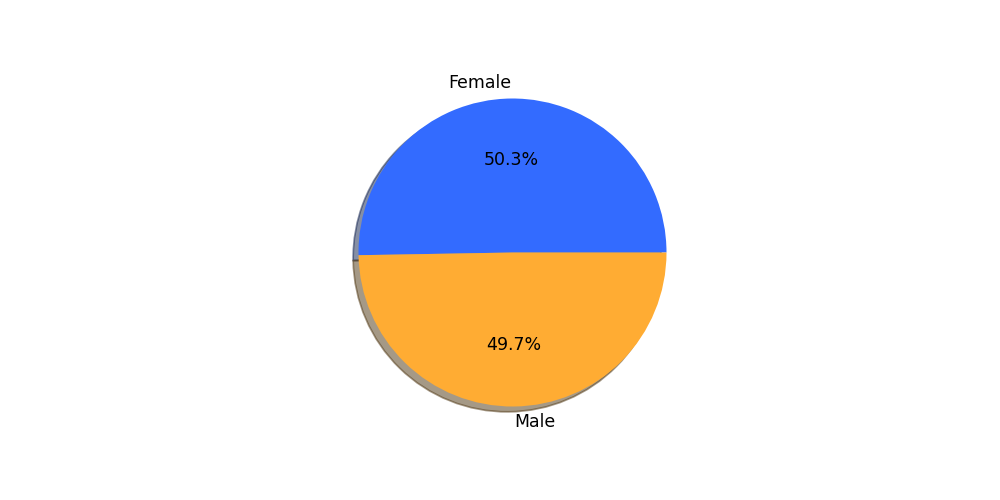

([<matplotlib.patches.Wedge at 0x25c214d1d50>,
 [Text(-0.009675938404905706, 1.0999574429113086, 'Female'),
  Text(0.009675938404905327, -1.0999574429113086, 'Male')],
 [Text(-0.005277784584494021, 0.5999767870425319, '50.3%'),
  Text(0.005277784584493813, -0.5999767870425319, '49.7%')])

In [90]:
colors = ['#336BFF','#FFAC33']
plt.figure(figsize=(8,4))
plt.pie(gender.values, labels = gender.index, autopct='%1.1f%%',colors = colors, shadow = True)

## What devices are used the most by the users?

In [50]:
deviceUsed = df.Device.value_counts()
print(deviceUsed)

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64


<IPython.core.display.Javascript object>


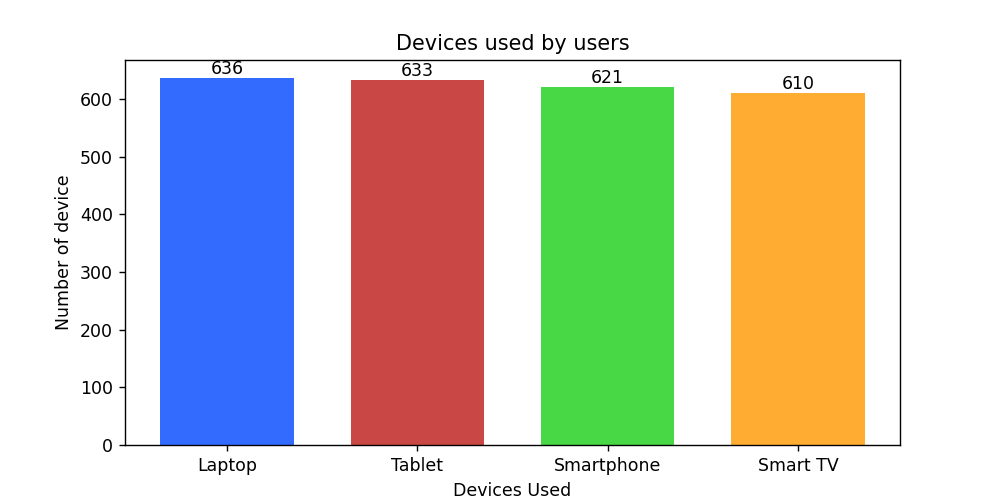

Text(0, 0.5, 'Number of device')

In [51]:
plt.figure(figsize=(8,4))
plt.title("Devices used by users")
plt.bar_label(plt.bar(deviceUsed.index, deviceUsed.values, width = 0.7, color = ['#336BFF',"#C94845","#49D845","#FFAC33"]))
plt.xlabel("Devices Used")
plt.ylabel("Number of device")

## Which are the most comman plans subscribed by users?


In [52]:
Plans = df['Subscription Type'].value_counts()
print(Plans)

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64


<IPython.core.display.Javascript object>


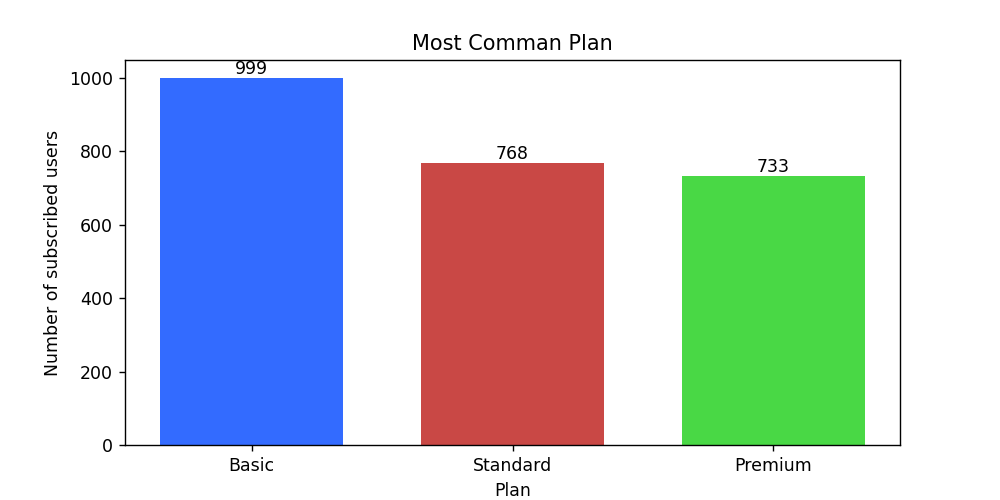

Text(0, 0.5, 'Number of subscribed users')

In [53]:
plt.figure(figsize=(8,4))
plt.title("Most Comman Plan")
plt.bar_label(plt.bar(Plans.index, Plans.values, width = 0.7, color = ['#336BFF',"#C94845","#49D845"]))
plt.xlabel("Plan")
plt.ylabel("Number of subscribed users")

## Which plan is giving the most income?

In [145]:
#as we know the revenue of each plan is, basic = 10, standard = 12, premium = 15
plans = df['Subscription Type'].value_counts()
basic = 999 * 10
standard = 768 * 12
premium = 733 * 15
lst = [basic,standard,premium]
print(plans)
print(lst)

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64
[9990, 9216, 10995]


<IPython.core.display.Javascript object>


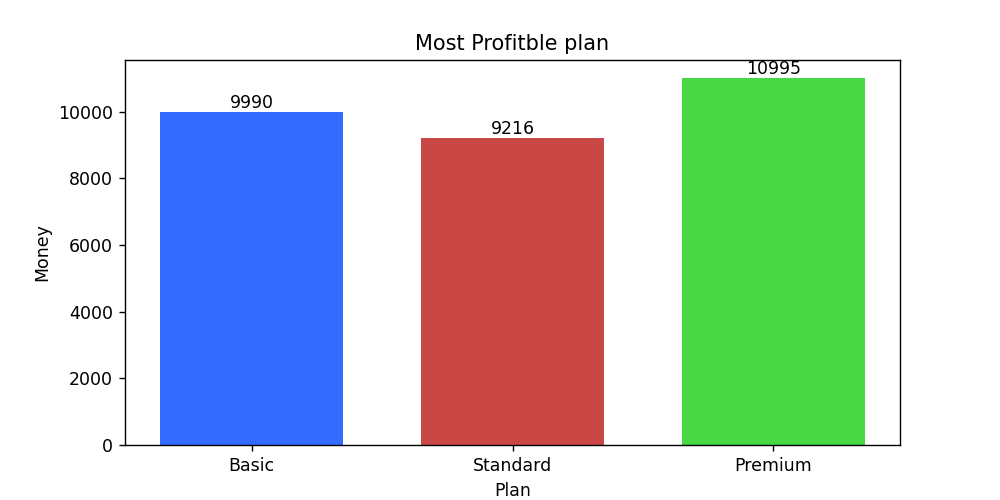

Text(0, 0.5, 'Money')

In [158]:
plt.figure(figsize=(8,4))
plt.title("Most Profitble plan")
plt.bar_label(plt.bar(plans.index, lst, width = 0.7, color = ['#336BFF',"#C94845","#49D845"]))
plt.xlabel("Plan")
plt.ylabel("Money")

## Number of User on Devices and their Age


<IPython.core.display.Javascript object>


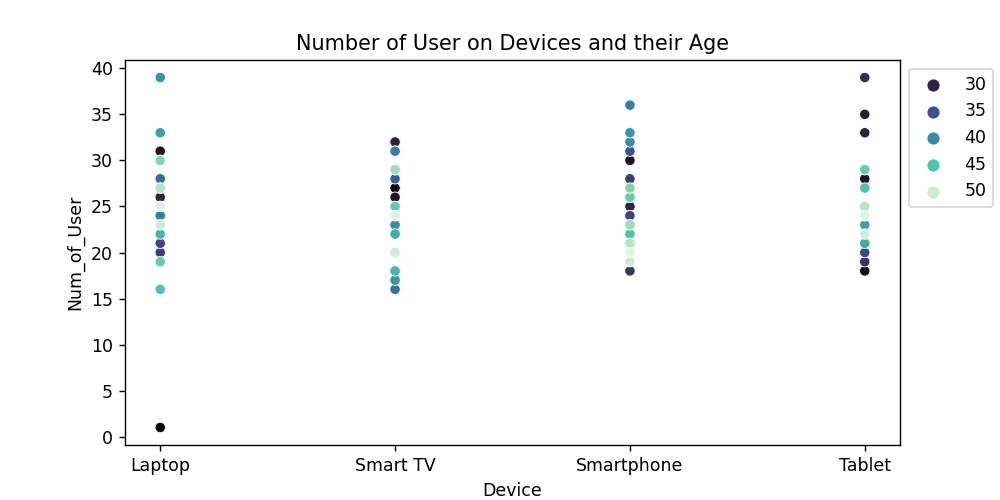

Text(0.5, 1.0, 'Number of User on Devices and their Age')

In [135]:
plt.figure(figsize=(8,4))
device_data = df.groupby(['Device','Age']).count()['User ID'].reset_index()
device_data.rename(columns = {'Device':'Device' , 'Age':'Age', 'User ID':'Num_of_User'}, inplace = True)
sns.scatterplot(data = device_data , x= 'Device' , y = 'Num_of_User', hue = 'Age', palette = 'mako')
plt.legend(loc= 'best' ,bbox_to_anchor=(1, 1))
plt.title('Number of User on Devices and their Age')

## Age distribution

<IPython.core.display.Javascript object>


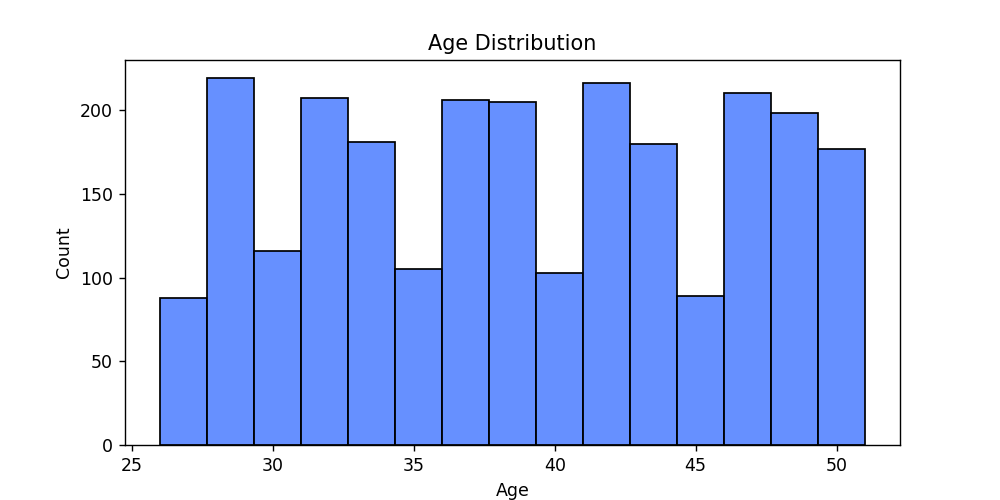

In [165]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x="Age",stat="count",color = '#336BFF',bins = 15)
plt.title("Age Distribution")
plt.show()

## Devices used by countries

          Country  Smartphone  Laptop  SmartTV  Tablet
0   United States          99     121      116     115
1          Canada          80      64       78      95
2  United Kingdom          54      44       40      45
3       Australia          55      47       38      43
4         Germany          36      63       42      42
5          France          47      52       43      41
6          Brazil          55      44       40      44
7          Mexico          46      44       41      52
8           Spain         102     107      126     116
9           Italy          47      50       46      40


<IPython.core.display.Javascript object>


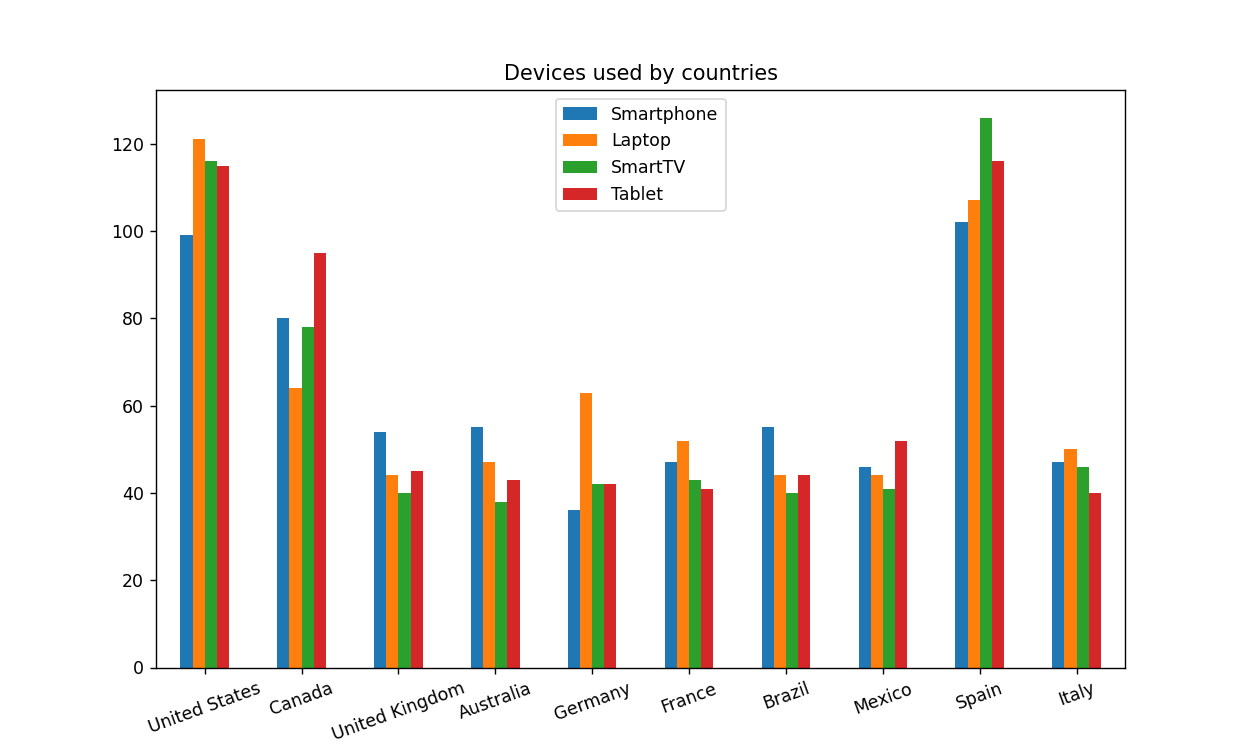

<Axes: title={'center': 'Devices used by countries'}, xlabel='Country'>

In [121]:
countryGroup = df.groupby(['Country'])
lst = []
for countries in df.Country.unique():
    smartphoneCount = countryGroup.get_group(countries).Device.value_counts()['Smartphone']
    laptopCount = countryGroup.get_group(countries).Device.value_counts()['Laptop']
    smartTVCount = countryGroup.get_group(countries).Device.value_counts()['Smart TV']
    tabletCount = countryGroup.get_group(countries).Device.value_counts()['Tablet']
     
    dic = {'Country': countries, 'Smartphone': smartphoneCount, 'Laptop': laptopCount, 'SmartTV': smartTVCount, 'Tablet': tabletCount}
    lst.append(dic)
newDF = pd.DataFrame.from_dict(lst)
print(newDF)
newDF.plot.bar(x = "Country", y = ["Smartphone",  "Laptop",  "SmartTV",  "Tablet"], title="Devices used by countries",figsize=(10,6), rot=20)

### Conclusion

#### Findings Overview
Although the least common plan is `premium` still that plan is making the most money, interesting insights about `Devices` and `Country`, how different countries prefer to watch Netflix. This is also interesting how almost every 5 years of age the amount of people using Netflix is dropped.



